In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('semantic_data.csv', encoding='unicode_escape')

In [3]:
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


* Dropping unnecessary columns where selected text will be regenrated later on. 

In [4]:
data.drop('selected_text', axis = 1, inplace = True)
data.drop('textID', axis = 1, inplace = True)
data.drop('Population -2020', axis = 1, inplace = True)
data.drop('Land Area (Km²)', axis = 1, inplace = True)
data.drop('Density (P/Km²)', axis = 1, inplace = True)

In [5]:
data.head(3)

,text,sentiment,Time of Tweet,Age of User,Country
0,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan
1,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania
2,my boss is bullying me...,negative,night,31-45,Algeria


<Axes: xlabel='sentiment', ylabel='count'>

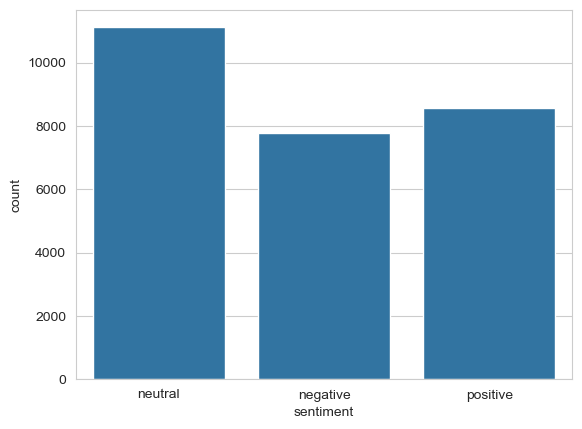

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment',data=data)

In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import re
import string
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           27480 non-null  object
 1   sentiment      27481 non-null  object
 2   Time of Tweet  27481 non-null  object
 3   Age of User    27481 non-null  object
 4   Country        27481 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


In [9]:
data = data.dropna(subset=['text'])

In [10]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [11]:
data['text_upd'] = data['text'].astype('str').apply(get_text_processing)
data.head()

,text,sentiment,Time of Tweet,Age of User,Country,text_upd
0,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,Id responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,Sooo SAD miss San Diego
2,my boss is bullying me...,negative,night,31-45,Algeria,boss bullying
3,what interview! leave me alone,negative,morning,46-60,Andorra,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,Sons couldnt put releases already bought
